In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Resources.2/final_temperature_change.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
0,AFG,1970,0.898
1,AFG,1971,0.652
2,AFG,1972,-1.089
3,AFG,1973,0.262
4,AFG,1974,-0.470


In [3]:
mex_temp_anom_df= temp_anom_df[(temp_anom_df['country_code_alpha_three'] == 'MEX')]
mex_temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
6569,MEX,1970,-0.307
6570,MEX,1971,-0.075
6571,MEX,1972,0.296
6572,MEX,1973,-0.176
6573,MEX,1974,-0.094


In [4]:
mex_temp_anom_df= mex_temp_anom_df.drop(['country_code_alpha_three'], axis=1)
mex_temp_anom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 6569 to 6619
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 51 non-null     int64  
 1   temp_change_celsius  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [7]:
mex_temp_anom_df = mex_temp_anom_df.dropna( )

In [8]:
mex_temp_anom_df.head()

,year,temp_change_celsius
6569,1970,-0.307
6570,1971,-0.075
6571,1972,0.296
6572,1973,-0.176
6573,1974,-0.094


In [9]:
mex_temp_anom_df.set_index('year',inplace = True)
mex_temp_anom_df.head()

,temp_change_celsius
year,
1970,-0.307
1971,-0.075
1972,0.296
1973,-0.176
1974,-0.094


AxesSubplot(0.125,0.125;0.775x0.755)


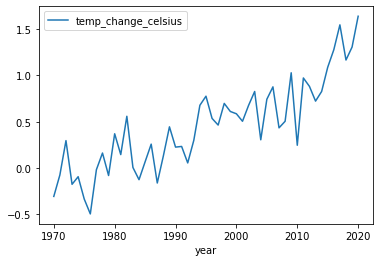

In [10]:
axis = mex_temp_anom_df.plot.line(y='temp_change_celsius',rot=0)
print(axis)
plt.show()

In [11]:
mex_temp_anom_df= mex_temp_anom_df.sort_values('temp_change_celsius',ascending=False)
mex_temp_anom_df.head(10)

,temp_change_celsius
year,
2020,1.640
2017,1.547
2019,1.307
2016,1.278
2018,1.167
2015,1.089
2009,1.029
2011,0.973
2012,0.882


In [12]:
mex_temp_anom_df.describe()

,temp_change_celsius
count,51.000000
mean,0.457098
std,0.490009
min,-0.496000
25%,0.099000
50%,0.445000
75%,0.759500
max,1.640000


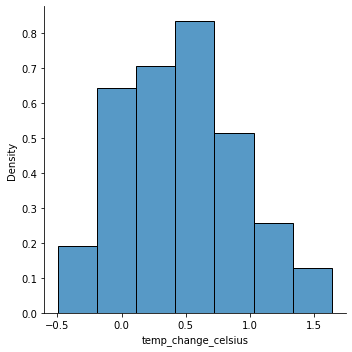

In [13]:
import seaborn as sb

# Extract feature we're interested in
data = mex_temp_anom_df['temp_change_celsius']

# Generate histogram/distribution plot
sb.displot(data, stat="density")

plt.show()

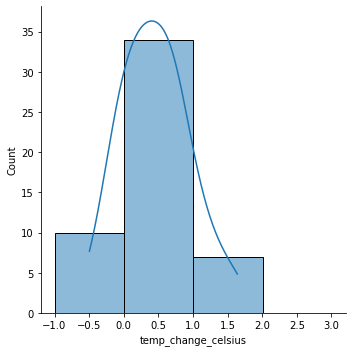

In [14]:
sb.displot(data, discrete = True, kde = True)
plt.show()

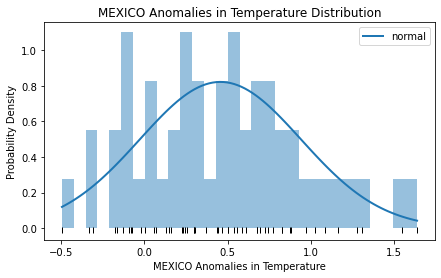

In [15]:
# Histogram
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('MEXICO Anomalies in Temperature Distribution')
ax.set_xlabel('MEXICO Anomalies in Temperature')
ax.set_ylabel('Probability Density')
ax.legend();

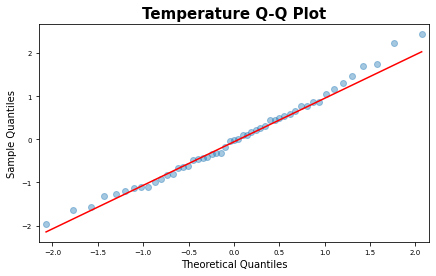

In [16]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Temperature Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x27cd9a879c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27cd9a73408>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cd9a87488>],
 'medians': [<matplotlib.lines.Line2D at 0x27cd9a8cac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cd9a8cf48>],
 'means': []}

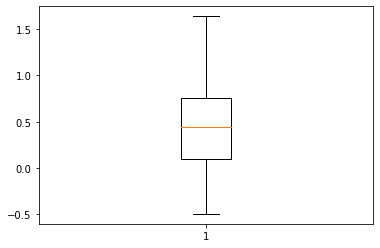

In [17]:
plt.boxplot(data)

In [18]:
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: -0.3503005959443075
Skewness: 0.34018493675679035


In [19]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.9849474430084229, pvalue=0.7593530416488647)

In [20]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1.2374415186486136, p-value = 0.5386330383496507
